In [1]:
import pandas as pd 
from newsapi import NewsApiClient
from textblob import TextBlob
import requests
from datetime import datetime


In [34]:
# data collection


# specify date in YYYY-MM-DD format
date = '2023-04-21'

# set up request parameters
params = {
    'q': 'Nifty India',
    'from': date,
    'to': date,
    'apiKey': '4a51169c54fb4d2880c2f0445f1a2adc'
}

# make API request
response = requests.get('https://newsapi.org/v2/everything', params=params)

# get list of articles
articles = response.json()['articles']

# print article titles
for article in articles:
    print(article['title'])

# get the price data here

Trade Spotlight | What#39;s your strategy for Indigo Paints, Cummins India, JSW Energy today?
Technical View | Nifty forms Bearish Engulfing pattern on weekly scale, 17,500-17,600 area crucial next week
SGX Nifty up 20 points; here's what changed for market while you were sleeping - The Economic Times
SGX Nifty up 20 points; here's what changed for market while you were sleeping - The Economic Times
Bernstein adds RIL, Biocon, MM to portfolio, removes 10% cash, covers short from IEX
Hot Stocks | Lemon Tree Hotels, Mahindra Holidays, Navin Fluorine may fetch up to 17% in short term
India stocks mixed at close of trade; Nifty 50 down 0.02%
Stock market update: Stocks that hit 52-week highs on NSE in today's trade
Stock market update: Nifty Bank index falls 0.36%
ACC shares down 1.15% as Nifty drops
INDIA STOCKS-Indian shares muted on risk aversion amid Q4 earnings
INDIA STOCKS-Indian shares subdued on risk aversion amid Q4 earnings
Looking to invest in gold this Akshaya Tritiya? You can 

In [25]:
# Cleaning? 
## some logic to filter the relevant news articles
### considering the timing of the news release


    


In [45]:
# sentiment analysis
# Extract sentiment from each news article
## adding that as a feature
avg_pola=0
avg_subj=0
for article in articles:
    title = article['title']
    description = article['description']
    content = article['content']
    
    # Concatenate the title, description, and content of the article
    text = f"{title}. {description}. {content}"
    
    # Perform sentiment analysis using TextBlob
    analysis = TextBlob(text)
    article['polarity'] = analysis.sentiment.polarity
    article['subjectivity'] = analysis.sentiment.subjectivity
    
    # Print the sentiment analysis results
    print("Title: ", title)
    print("Sentiment Polarity: ", polarity)
    print("Sentiment Subjectivity: ", subjectivity)
    print("----")
    
    # logic for getting average sentiment from this

Title:  Trade Spotlight | What#39;s your strategy for Indigo Paints, Cummins India, JSW Energy today?
Sentiment Polarity:  0.0
Sentiment Subjectivity:  0.0
----
Title:  Technical View | Nifty forms Bearish Engulfing pattern on weekly scale, 17,500-17,600 area crucial next week
Sentiment Polarity:  0.0
Sentiment Subjectivity:  0.0
----
Title:  SGX Nifty up 20 points; here's what changed for market while you were sleeping - The Economic Times
Sentiment Polarity:  0.0
Sentiment Subjectivity:  0.0
----
Title:  SGX Nifty up 20 points; here's what changed for market while you were sleeping - The Economic Times
Sentiment Polarity:  0.0
Sentiment Subjectivity:  0.0
----
Title:  Bernstein adds RIL, Biocon, MM to portfolio, removes 10% cash, covers short from IEX
Sentiment Polarity:  0.0
Sentiment Subjectivity:  0.0
----
Title:  Hot Stocks | Lemon Tree Hotels, Mahindra Holidays, Navin Fluorine may fetch up to 17% in short term
Sentiment Polarity:  0.0
Sentiment Subjectivity:  0.0
----
Title:  In

In [54]:
import yfinance as yf

price_data=yf.download("^NSEI",start="2023-01-23")

[*********************100%***********************]  1 of 1 completed


In [31]:
avg_pola/93

0.06991740832812843

In [32]:
avg_subj/93

0.40956284570063495

In [17]:
## more features that can be used in the strategy

In [19]:
# Signal Generation
## either hard coded condition or an ML Model

In [ ]:
# Backtesting

In [56]:
import requests
from newsapi import NewsApiClient
from textblob import TextBlob
from datetime import datetime, timedelta

# Initialize NewsAPI client
newsapi = NewsApiClient(api_key='4a51169c54fb4d2880c2f0445f1a2adc')

# Set search parameters
query = 'Tesla'
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# Get news articles from NewsAPI
articles = newsapi.get_everything(q=query,
                                   from_param=start_date.strftime("%Y-%m-%d"),
                                   to=end_date.strftime("%Y-%m-%d"),
                                   language='en',
                                   sort_by='relevancy')

# Initialize lists to store features
titles = []
descriptions = []
polarities = []
subjectivities = []

# Loop through each article and extract features
for article in articles['articles']:
    # Extract title and description
    title = article['title']
    description = article['description']
    
    # Perform sentiment analysis on title and description
    title_blob = TextBlob(title)
    description_blob = TextBlob(description)
    polarity = (title_blob.sentiment.polarity + description_blob.sentiment.polarity) / 2
    subjectivity = (title_blob.sentiment.subjectivity + description_blob.sentiment.subjectivity) / 2
    
    # Append features to lists
    titles.append(title)
    descriptions.append(description)
    polarities.append(polarity)
    subjectivities.append(subjectivity)

# Print results
print('Titles:', titles)
print('Descriptions:', descriptions)
print('Polarities:', polarities)
print('Subjectivities:', subjectivities)


Titles: ['Here’s the world’s first Tesla V4 Supercharger charging a VW ID Buzz', "Tesla's latest price cut brings Model 3 pricing below $40,000", 'Volkswagen ID.7 Review: Inoffensive to a Fault', 'Elon Musk’s wealth plummets by $12.6 billion after chaotic 24 hours at Twitter, Tesla, and SpaceX', "The Morning After: How to claim your cut of Meta's $725 million class action settlement", 'Tesla hikes U.S. prices - Reuters.com', 'Tesla reports quarterly margin below estimates - Reuters', 'Nasdaq futures fall 1% as Tesla earnings disappoint - Reuters', 'Wall Street slides after gloomy earnings led by Tesla - Reuters', 'Futures retreat as Treasury yields rise, Tesla slides - Reuters', 'Profit for Tesla short sellers rises in April -S3 Partners - Reuters', 'Breakingviews - Tesla can no longer succeed just on its own terms - Reuters', 'US jury set to decide test case in Tesla Autopilot crash - Reuters.com', 'Tesla to feel commodity cost pain until second half of 2023 - Reuters', 'Tesla settles

In [66]:
import requests
from textblob import TextBlob

# Set API key and search term
API_KEY = '4a51169c54fb4d2880c2f0445f1a2adc'
SEARCH_TERM = 'indian stocks'

# Define a function to get sentiment score of an article
def get_sentiment_score(article):
    blob = TextBlob(article['title'] + ' ' + article['description'])
    return blob.sentiment.polarity

# Make API request and get articles
url = f'https://newsapi.org/v2/everything?q={SEARCH_TERM}&apiKey={API_KEY}'
response = requests.get(url)
articles = response.json()['articles']

# Define the list of stocks to filter
stocks = ['AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT']

# Initialize dictionaries to store metrics for each stock
sentiment_scores = {stock: [] for stock in stocks}
num_articles = {stock: 0 for stock in stocks}

# Loop through articles and update metrics for each stock mentioned
for article in articles:
    for stock in stocks:
        if stock in article['title'] or stock in article['description']:
            sentiment_scores[stock].append(get_sentiment_score(article))
            num_articles[stock] += 1

# Calculate average sentiment score and number of articles for each stock
average_sentiment_scores = {stock: sum(scores)/len(scores) if len(scores) > 0 else None for stock, scores in sentiment_scores.items()}
    
# Filter stocks based on metrics
filtered_stocks = [stock for stock in stocks if num_articles[stock] > 0 and average_sentiment_scores[stock] is not None and num_articles[stock] > 10 and average_sentiment_scores[stock] > 0.2]

print(filtered_stocks)


[]


In [67]:
articles

[{'source': {'id': 'google-news', 'name': 'Google News'},
  'author': None,
  'title': 'Indian stocks may outperform Asian peers in long term - Jefferies - Reuters',
  'description': 'Indian stocks may outperform Asian peers in long term - Jefferies\xa0\xa0Reuters',
  'url': 'https://consent.google.com/ml?continue=https://news.google.com/rss/articles/CBMibWh0dHBzOi8vd3d3LnJldXRlcnMuY29tL21hcmtldHMvYXNpYS9pbmRpYW4tc3RvY2tzLW1heS1vdXRwZXJmb3JtLWFzaWFuLXBlZXJzLWxvbmctdGVybS1qZWZmZXJpZXMtMjAyMy0wMy0yNC_SAQA?oc%3D5&gl=FR&hl=en-US&cm=2&pc=n&src=1',
  'urlToImage': None,
  'publishedAt': '2023-03-24T08:38:00Z',
  'content': 'We use cookies and data to<ul><li>Deliver and maintain Google services</li><li>Track outages and protect against spam, fraud, and abuse</li><li>Measure audience engagement and site statistics to unde… [+1131 chars]'},
 {'source': {'id': 'business-insider', 'name': 'Business Insider'},
  'author': 'htan@insider.com (Huileng Tan)',
  'title': "The short seller who took on A

[*********************100%***********************]  1 of 1 completed
here
here
here
here
here
here
here
here
here


<AxesSubplot:xlabel='Date'>

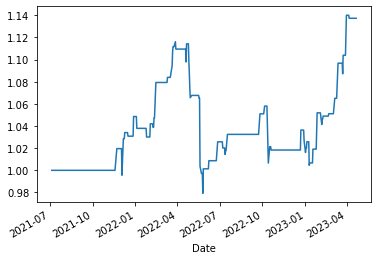

In [61]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the asset you want to trade
symbol = '^NSEI'

# Define the time period for the analysis
start_date = '2021-07-01'
end_date = '2023-04-23'

# Get the historical price data for the asset
asset_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the 50-day and 200-day moving averages
asset_data['5day_ma'] = asset_data['Close'].rolling(window=10).mean()
asset_data['50day_ma'] = asset_data['Close'].rolling(window=50).mean()
asset_data['200day_ma'] = asset_data['Close'].rolling(window=200).mean()

# Calculate the daily returns and the 30-day rolling standard deviation
asset_data['returns'] = asset_data['Close'].pct_change()
asset_data['std_dev'] = asset_data['returns'].rolling(window=30).std()

# Define the buy and sell signals based on momentum and mean reversion
asset_data['momentum_signal'] = np.where(asset_data['Close'] > asset_data['5day_ma'], 1, -1)
asset_data['mean_reversion_signal'] = np.where(asset_data['Close'] < asset_data['50day_ma'] - 2 * asset_data['std_dev'], 1, 0)
asset_data['signal'] = asset_data['momentum_signal'] * asset_data['mean_reversion_signal']

# Define the position based on the signals
asset_data['position'] = asset_data['signal'].diff()

stop_loss = 0.02  # 1% stop loss
entry_price = None

for i, row in asset_data.iterrows():
    if row['position'] == 1 and entry_price is None:
        print("here")
        entry_price = row['Close']
    elif row['position'] == -1 and entry_price is not None:
        exit_price = row['Close']
        if (exit_price / entry_price) - 1 < -stop_loss:
            asset_data.loc[i, 'position'] = 0
        entry_price = None
    elif row['position'] == 0 and entry_price is not None:
        exit_price = row['Close']
        if (exit_price / entry_price) - 1 < -stop_loss:
            asset_data.loc[i, 'position'] = 0
        entry_price = None

# Define the trade returns
asset_data['trade_returns'] = asset_data['returns'] * asset_data['position'].shift()

# Calculate the cumulative returns and plot the results
asset_data['cumulative_returns'] = (1 + asset_data['trade_returns']).cumprod()
asset_data['cumulative_returns'].plot()


In [43]:
len(asset_data[asset_data["signal"]==0])

320

[*********************100%***********************]  1 of 1 completed
Shapes:
X_test: (21, 5)
y_test: (21,)
y_pred: (21,)


/tmp/ipykernel_31761/3791709280.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data['5day_ma'] = asset_data['Close'].rolling(window=7).mean()
/tmp/ipykernel_31761/3791709280.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data['50day_ma'] = asset_data['Close'].rolling(window=50).mean()
/tmp/ipykernel_31761/3791709280.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

<AxesSubplot:xlabel='Date'>

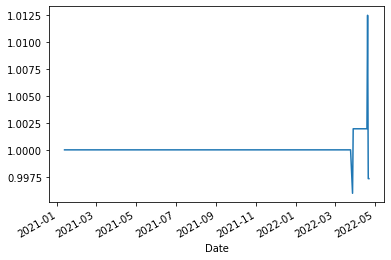

In [63]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# Define the asset you want to trade
symbol = '^NSEI'

# Define the time period for the analysis
start_date = '2021-01-01'
end_date = '2022-04-23'

# Get the historical price data for the asset
asset_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the future returns
asset_data['future_returns'] = asset_data['Close'].pct_change(periods=5)

# Remove the first 5 rows
asset_data = asset_data.iloc[5:]

# Define the input features for the ML model
X = asset_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Define the target variable (i.e., the future returns)
y = asset_data['future_returns']

# Define the size of the training set
train_size = int(0.95 * (len(asset_data) - 5))

# Split the data into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the ML model on the training data
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("y_pred:", y_pred.shape)

# Calculate the 50-day and 200-day moving averages
asset_data['5day_ma'] = asset_data['Close'].rolling(window=7).mean()
asset_data['50day_ma'] = asset_data['Close'].rolling(window=50).mean()
asset_data['200day_ma'] = asset_data['Close'].rolling(window=200).mean()
# Calculate the daily returns and the 30-day rolling standard deviation
asset_data['returns'] = asset_data['Close'].pct_change()
asset_data['std_dev'] = asset_data['returns'].rolling(window=30).std()
# Define the buy and sell signals based on the ML model predictions
asset_data['ml_signal'] = 0  # initialize with zeros
asset_data.loc[y_test.index, 'ml_signal'] = np.where(y_pred > 0, 1, -1)
asset_data['momentum_signal'] = np.where(asset_data['Close'] > asset_data['5day_ma'], 1, -1)
asset_data['mean_reversion_signal'] = np.where(asset_data['Close'] < asset_data['50day_ma'] - 2 * asset_data['std_dev'], 1, 0)


# asset_data['ml_signal'] = np.where(asset_data.index.isin(y_test.index), np.where(y_pred > 0, 1, -1), 0)
asset_data['signal'] = asset_data['momentum_signal'] * asset_data['mean_reversion_signal'] * asset_data['ml_signal']

# Define the position based on the signals
asset_data['position'] = asset_data['signal'].diff()

# Define the trade returns
asset_data['trade_returns'] = asset_data['returns'] * asset_data['position'].shift()

# Calculate the cumulative returns and plot the results
asset_data['cumulative_returns'] = (1 + asset_data['trade_returns']).cumprod()
asset_data['cumulative_returns'].plot()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

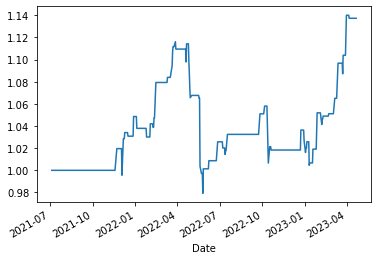

In [62]:

import pandas as pd
import numpy as np
import yfinance as yf

# Define the asset you want to trade
symbol = '^NSEI'

# Define the time period for the analysis
start_date = '2021-07-01'
end_date = '2023-04-23'

# Get the historical price data for the asset
asset_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the 50-day and 200-day moving averages
asset_data['5day_ma'] = asset_data['Close'].rolling(window=10).mean()
asset_data['50day_ma'] = asset_data['Close'].rolling(window=50).mean()
asset_data['200day_ma'] = asset_data['Close'].rolling(window=200).mean()

# Calculate the daily returns and the 30-day rolling standard deviation
asset_data['returns'] = asset_data['Close'].pct_change()
asset_data['std_dev'] = asset_data['returns'].rolling(window=30).std()

# Define the buy and sell signals based on momentum and mean reversion
asset_data['momentum_signal'] = np.where(asset_data['Close'] > asset_data['5day_ma'], 1, -1)
asset_data['mean_reversion_signal'] = np.where(asset_data['Close'] < asset_data['50day_ma'] - 2 * asset_data['std_dev'], 1, 0)
asset_data['signal'] = asset_data['momentum_signal'] * asset_data['mean_reversion_signal']

# Define the position based on the signals
asset_data['position'] = asset_data['signal'].diff()

stop_loss = 0.02  # 2% stop loss
entry_price = None

for i, row in asset_data.iterrows():
    if row['position'] == 1 and entry_price is None:
        # Enter a long trade
        entry_price = row['Close']
    elif row['position'] == -1 and entry_price is None:
        # Enter a short trade
        entry_price = row['Close']
    elif row['position'] == -1 and entry_price is not None:
        # Exit a long trade and enter a short trade
        exit_price = row['Close']
        if (exit_price / entry_price) - 1 < -stop_loss:
            # Trigger stop loss for long trade
            asset_data.loc[i, 'position'] = 0
        else:
            # Switch from long to short position
            entry_price = row['Close']
    elif row['position'] == 1 and entry_price is not None:
        # Exit a short trade and enter a long trade
        exit_price = row['Close']
        if (entry_price / exit_price) - 1 < -stop_loss:
            # Trigger stop loss for short trade
            asset_data.loc[i, 'position'] = 0
        else:
            # Switch from short to long position
            entry_price = row['Close']
    elif row['position'] == 0 and entry_price is not None:
        # Exit a long or short trade
        exit_price = row['Close']
        if (row['momentum_signal'] == 1 and (exit_price / entry_price) - 1 < -stop_loss) or \
           (row['momentum_signal'] == -1 and (entry_price / exit_price) - 1 < -stop_loss):
            # Trigger stop loss for long or short trade
            asset_data.loc[i, 'position'] = 0
        entry_price = None
# Define the trade returns
asset_data['trade_returns'] = asset_data['returns'] * asset_data['position'].shift()

# Calculate the cumulative returns and plot the results
asset_data['cumulative_returns'] = (1 + asset_data['trade_returns']).cumprod()
asset_data['cumulative_returns'].plot()

